# Detección de color de imagen usando OpenCV en Python

Hay varias aplicaciones para la detección de color. Podemos usarlo para distinguir objetos en la vida real. Esto también puede considerarse una técnica de segmentación de imágenes, ya que tratamos de etiquetar cada píxel en función de características similares.

Detectaremos el color utilizando el espacio de color HSV, que significa valor de saturación de tono. Este es un espacio de color cilíndrico, que es muy útil cuando se trabaja con información de color.

El matiz determina la información del color, la saturación representa la intensidad del color y el valor determina el brillo en función de la cantidad de color que se mezcla con el negro.
Detectaremos un color específico en una imagen dada y agregaremos límites alrededor de los segmentos detectados.

Necesitamos convertir la imagen requerida del espacio de color BGR a HSV. Para realizar tales conversiones en imágenes, podemos usar la función cvtColor() de la biblioteca OpenCV.

Necesitamos los límites para el color dado y devolvemos una máscara binaria de los lugares donde el color está presente en la imagen. La función inRange() de OpenCV toma una imagen determinada y devuelve la máscara binaria de dónde se encuentra actualmente el color en función de los límites superior e inferior especificados.

Esta máscara es el subconjunto de la imagen donde se detecta el color.

Luego podemos aplicar operaciones morfológicas a esta máscara binaria para filtrar el ruido no deseado. Usaremos la función morphologyex() de la biblioteca OpenCV para lograr esto.

Realiza la erosión después de la dilatación para cerrar pequeños agujeros en el objeto.

También necesitamos agregar límites a la imagen usando esta máscara binaria creada.

bitwise_and() se usa para segmentar las partes de la imagen que coinciden con una máscara dada. La máscara se proporciona mediante el parámetro mask.

Compara cada píxel de la imagen de origen y hace coincidir el correspondiente en la máscara especificada.

Para agregar los límites a esta imagen segmentada, usaremos los dos métodos, findContours() y drawContours(). Este contorno se puede considerar como una curva que une puntos a lo largo de un límite para una imagen segmentada.


La primera función devuelve una lista de todos los contornos de la imagen dada. Usaremos la función drawcontours() para dibujar los contornos.

Ahora implementemos el código para la detección de color y encontremos el color verde en la siguiente imagen.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [105]:
import cv2
import numpy as np

img = cv2.imread('Imagen_test\\sombrero2.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#bound_lower = np.array([0, 0, 100])
#bound_upper = np.array([40, 255, 255])
bound_lower = np.array([130, 150, 50])
bound_upper = np.array([200, 250, 250])

mask_green = cv2.inRange(hsv_img, bound_lower, bound_upper)
kernel = np.ones((7,7),np.uint8)

mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)

seg_img = cv2.bitwise_and(img, img, mask=mask_green)
contours, hier = cv2.findContours(mask_green.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.drawContours(seg_img, contours, -1, (0, 0, 255), 1)

cv2.imshow("Result", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

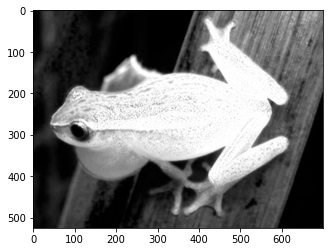

In [98]:
plt.figure()
plt.imshow(src[:,:,0], cmap='gray')


In [70]:
hsv_img[300,300,:] 

IndexError: index 300 is out of bounds for axis 1 with size 235

In [7]:
hsv_img[250,300,:]

array([178,  75, 240], dtype=uint8)

In [22]:
hsv_img[30,600,:]

array([ 53, 109, 196], dtype=uint8)